In [ ]:
import pandas as pd
import numpy as np
import scipy.optimize as optimize
import matplotlib.pyplot as plt
from tqdm import tqdm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/problem_set_2_sample/'

# problem 1

In [ ]:
def logfun(X, y, network, sigma, lambda_, beta1, beta2, alpha):
    mg = len(X)
    I = np.eye(mg)
    epsilon = np.dot((I - lambda_*network),y) - np.dot(X, beta1).reshape(-1,1) - np.dot(network,np.dot(X, beta2)).reshape(-1,1) - alpha
    return (mg/2*np.log(2*np.pi)) + (mg/2*np.log(sigma**2)) - np.log(np.linalg.det(I-lambda_*network)) + (1/(2*sigma**2)*np.dot(epsilon.T,epsilon))

def data_loadding(i):
    group = np.loadtxt(path + 'group/group%s.dat'%i)
    network = np.loadtxt(path + 'network/network%s.dat'%i)
    data = pd.DataFrame(group)
    X = data[[0,1,2,3,4,5,7,8,9,10,11,12,13]].values
    y = data[[17]].values
    return X, y, network

def total_logfun(para):
    for i in range(1,77):
        sigma = para[0]
        lambda_ = para[1]
        beta1 = para[2:15]
        beta2 = para[15:28]
        alpha = para[i+27]
        value = logfun(load_X['group%s'%i], load_y['group%s'%i], load_network['group%s'%i], sigma, lambda_, beta1, beta2, alpha)
        value += value
    return value[0][0]


In [ ]:
load_X = {}
load_y = {}
load_network = {}
for i in range(1,77):
    X, y, network = data_loadding(i)
    load_X['group%s'%i] = X
    load_y['group%s'%i] = y
    load_network['group%s'%i] = network

In [ ]:
def estimator(sig, lamb, beta1, beta2):
        alpha = np.zeros(76)+5
        beta1 = np.zeros(13)+beta1
        beta2 = np.zeros(13)+beta2
        sig_lamb = np.array([sig, lamb])
        value = 0
        para = np.concatenate((sig_lamb, beta1, beta2, alpha), axis=0)

        buds = [(None,None), (-0.1, 0.1)]
        for i in range(len(para)-2):
            buds.append((None,None))

        result = optimize.minimize(total_logfun, para, bounds=buds, method='SLSQP',options={'disp': True, 'maxiter' : 200})
        #result = optimize.minimize(total_logfun, para, bounds=buds,options={'disp': True, 'maxiter' : 1000})
        return result

In [ ]:
from datetime import datetime
start=datetime.now()
value = estimator(0.706, 0.068, 0.499, 0.491) #teacher table1 SAR modle
print(datetime.now()-start)

In [ ]:
para = value.x
std = value.jac
print('sigma :', para[0])
print('sigma standard error:', (1/(std[0]*std[0]))**0.5)
print('-----------------------------------------------------------------------------------')
print('Lambda :', para[1])
print('Lambda standard error:', (1/(std[1]*std[1]))**0.5)
print('-----------------------------------------------------------------------------------')
print('Beta1 :', para[2:16])
print('Beta1 standard error:', (1/(std[2:16]*std[2:16]))**0.5)
print('-----------------------------------------------------------------------------------')
print('Beta2 :', para[16:30])
print('Beta2 standard error:', (1/(std[16:30]*std[16:30]))**0.5)
print('-----------------------------------------------------------------------------------')
print('Alpha :', para[30:])
print('Alpha standard error:', (1/(std[30:]*std[30:]))**0.5)

sigma : -0.18569969400174893
sigma standard error: 54.87915423666719
-----------------------------------------------------------------------------------
Lambda : -0.06069261736745064
Lambda standard error: 11.242462011863502
-----------------------------------------------------------------------------------
Beta1 : [ 0.74843038  0.18470747  0.499      -3.85017135 -0.75946049 -0.71177146
  0.499      -1.89822857 -3.93403551  0.499      -2.30698297 -1.06460285
 -3.0346119  -0.23784592]
Beta1 standard error: [1.53162873e+01 2.66966075e+02            inf 1.73032343e+03
 4.98135867e+02 1.09340563e+03            inf 1.76751117e+03
 4.45018992e+02            inf 5.64509287e+03 2.81213812e+02
 7.69879589e+02 2.31596559e+00]
-----------------------------------------------------------------------------------
Beta2 : [ 1.71677677  0.491       0.491       2.09419424  1.17650296  0.491
  0.42710457 -0.8447962   0.491       1.03779278  2.14813572  1.50757798
  5.          5.        ]
Beta2 standard 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()


# problem 2-3

In [ ]:
def logfun(X, y, network, sigma, lambda_, beta1, beta2, alpha):
    mg = len(X)
    I = np.eye(mg)
    epsilon = np.dot((I - lambda_*network),y) - np.dot(X, beta1).reshape(-1,1) - np.dot(network,np.dot(X, beta2)).reshape(-1,1) - alpha
    return -(mg/2*np.log(2*np.pi)) - (mg/2*np.log(sigma**2)) + np.log(np.linalg.det(I-lambda_*network)) - (1/(2*sigma**2)*np.dot(epsilon.T,epsilon))

def data_loadding(i):
    group = np.loadtxt(path + 'group/group%s.dat'%i)
    network = np.loadtxt(path + 'network/network%s.dat'%i)
    data = pd.DataFrame(group)
    X = data[[0,1,2,3,4,5,7,8,9,10,11,12,13]].values
    y = data[[17]].values
    return X, y, network

def total_logfun(sigma, lambda_, beta1, beta2, alpha):
    sigma = sigma
    lambda_ = lambda_
    beta1 = beta1
    beta2 = beta2
    for i in range(1,77):
        alpha_ = alpha[i-1]
        value = logfun(load_X['group%s'%i], load_y['group%s'%i], load_network['group%s'%i], sigma, lambda_, beta1, beta2, alpha_)
        value += value
    return value[0][0]

In [ ]:
load_X = {}
load_y = {}
load_network = {}
for i in range(1,77):
    X, y, network = data_loadding(i)
    load_X['group%s'%i] = X
    load_y['group%s'%i] = y
    load_network['group%s'%i] = network

In [ ]:
# Lambda

def lambda_(t):
    lambda_t = np.random.multivariate_normal([lambda_T[t-1]], np.eye(1)*0.1**2)
    like_2 = total_logfun(sigma2_T[t-1], lambda_T[t-1], beta1_T[t-1], beta2_T[t-1], alpha_T[t-1])
    like_1 = total_logfun(sigma2_T[t-1], lambda_t, beta1_T[t-1], beta2_T[t-1], alpha_T[t-1])
    pp_l = like_1 - like_2
    pp_l = min([np.exp(pp_l), 1])
    if np.random.rand(1)[0] <= pp_l:
        lambda_T[t] = lambda_t
    else:
        lambda_T[t] = lambda_T[t-1]
    return lambda_T

In [ ]:
# Beta

def beta_(t):
    zvx1, zvx2 = 0, 0
    zvy1, zvy2 = 0, 0
    for i in range(1,77):
        mg = len(load_X['group%s'%i])
        I = np.eye(mg)
        ss = I - lambda_T[t]*load_network['group%s'%i] # mg*mg
        yy = np.dot(ss,load_y['group%s'%i]) - alpha_T[t-1][i-1]
        zz_x1 = load_X['group%s'%i] # mg*13
        zz_x2 = np.dot(load_network['group%s'%i], load_X['group%s'%i]) # mg*13

        zvx1 = zvx1 + np.dot(zz_x1.T, zz_x1)/(sigma2_T[t-1]**2) # 13*13
        zvx2 = zvx2 + np.dot(zz_x2.T, zz_x2)/(sigma2_T[t-1]**2)

        zvy1 = zvy1 + np.dot(zz_x1.T, yy)/(sigma2_T[t-1]**2) # mg*1
        zvy2 = zvy2 + np.dot(zz_x2.T, yy)/(sigma2_T[t-1]**2)

    B1 = np.linalg.inv((np.linalg.inv(B_0)+zvx1))
    B2 = np.linalg.inv((np.linalg.inv(B_0)+zvx2))
    mean_beta1 = np.ravel((np.dot(B1, (np.dot(np.linalg.inv(B_0), beta1_0).reshape(-1, 1)+zvy1))))
    mean_beta2 = np.ravel((np.dot(B2, (np.dot(np.linalg.inv(B_0), beta2_0).reshape(-1, 1)+zvy2))))
    beta1_hat = np.random.multivariate_normal(mean_beta1, B1, 1)
    beta2_hat = np.random.multivariate_normal(mean_beta2, B2, 1)

    beta1_T[t], beta2_T[t]= beta1_hat, beta2_hat
    return beta1_T, beta2_T


In [ ]:
# Sigma^2

def sigma2_(t):
    ep_ = np.zeros(1)
    for i in range(1, 77):
        y = load_y['group%s'%i]
        X = load_X['group%s'%i]
        network = load_network['group%s'%i]
        mg = len(load_X['group%s'%i])
        I = np.eye(mg)
        epsilon = np.dot((I - lambda_T[t]*network),y) - np.dot(X, beta1_T[t]).reshape(-1,1)
        - np.dot(network,np.dot(X, beta2_T[t])).reshape(-1,1) - alpha_T[t-1][i-1]
        ep_ = np.append(ep_, epsilon)
    ep_ = ep_[1:]
    rho_1 = rho_0 + len(ep_)
    chi = np.random.chisquare(rho_1)
    sigma2_T[t] = (np.dot(ep_.reshape(1,-1), ep_.reshape(-1,1))[0][0] + eta_0)/chi
    return sigma2_T

In [ ]:
# Alpha

def alpha_(t):
    dd = 1/(1/alpha_0 + 1/sigma2_T[t])
    for i in range(1,77):
        mg = len(load_X['group%s'%i])
        I = np.eye(mg)
        ss = I - lambda_T[t]*load_network['group%s'%i] # mg*mg
        yy = np.dot(ss,load_y['group%s'%i]) # mg*1
        zz_x1 = load_X['group%s'%i] # mg*13
        zz_x2 = np.dot(load_network['group%s'%i], load_X['group%s'%i]) # mg*13
        alpha_T[t][i-1] = (dd/sigma2_T[t]*sum(yy - np.dot(load_X['group%s'%i], beta1_T[t]).reshape(-1,1) 
            - np.dot(load_network['group%s'%i],np.dot(load_X['group%s'%i], beta2_T[t])).reshape(-1,1))[0]) + np.random.normal(0, dd**0.5, 1)
    return alpha_T

In [ ]:
_lambda, _beta1, _beta2, _sigma2, _alpha = [], [], [], [], []

In [ ]:
T = 50000
beta1_T = np.zeros([T, 13])
beta2_T = np.zeros([T, 13])
lambda_T = np.zeros(T)
sigma2_T = np.zeros(T) + 1
alpha_T = np.zeros([T, 76])
rho_0 = 2.2
eta_0 = 0.1

alpha_0 = 1
beta1_0 = np.zeros(13)
beta2_0 = np.zeros(13)
B_0 = np.eye(13) + 3

zvx1, zvx2 = 0, 0
zvy1, zvy2 = 0, 0

for t in tqdm(range(1,T)):
    lambda_(t)
    beta_(t)
    sigma2_(t)
    alpha_(t)

串流輸出內容已截斷至最後 5000 行。
 98%|█████████▊| 48873/49999 [1:02:59<01:30, 12.44it/s]


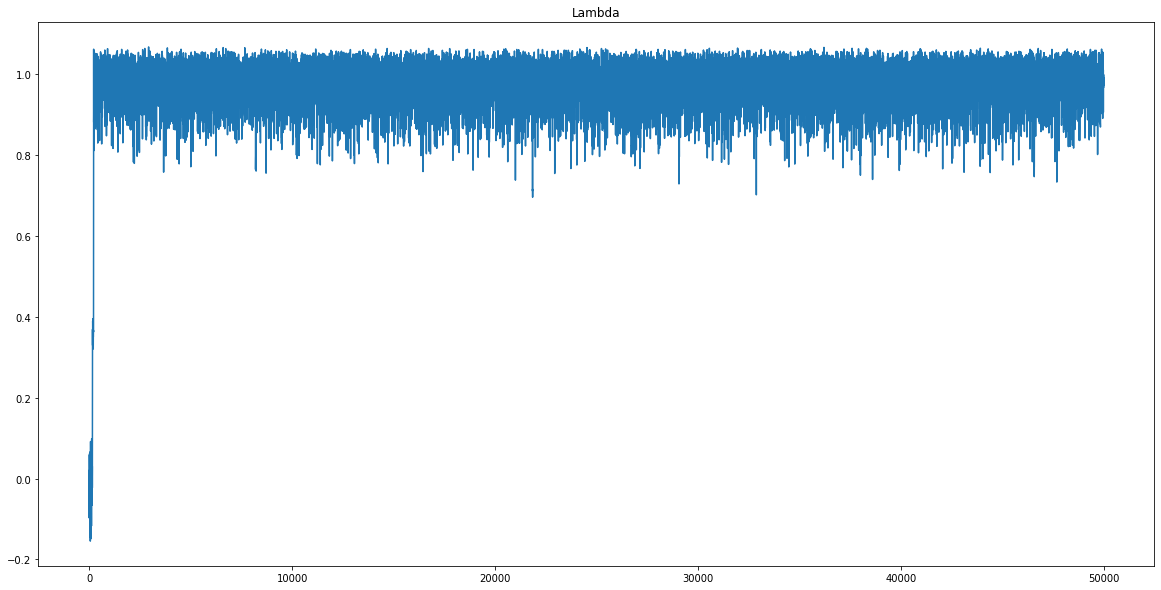

In [ ]:
plt.figure(figsize=(20,10))
plt.title('Lambda')
plt.plot(lambda_T)

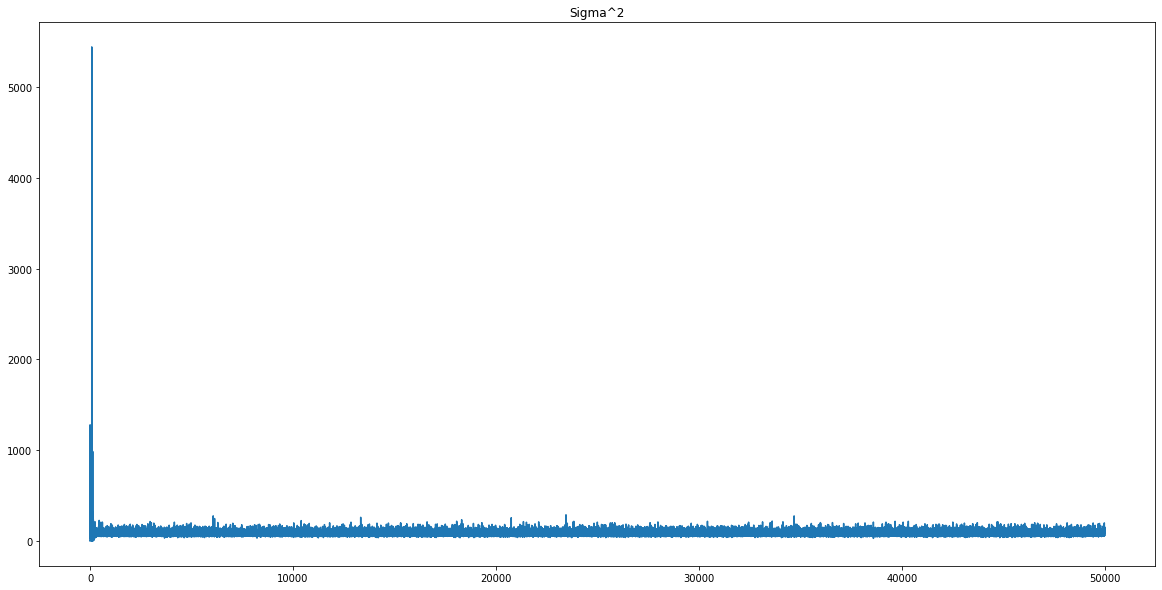

In [ ]:
plt.figure(figsize=(20,10))
plt.title('Sigma^2')
plt.plot(sigma2_T)

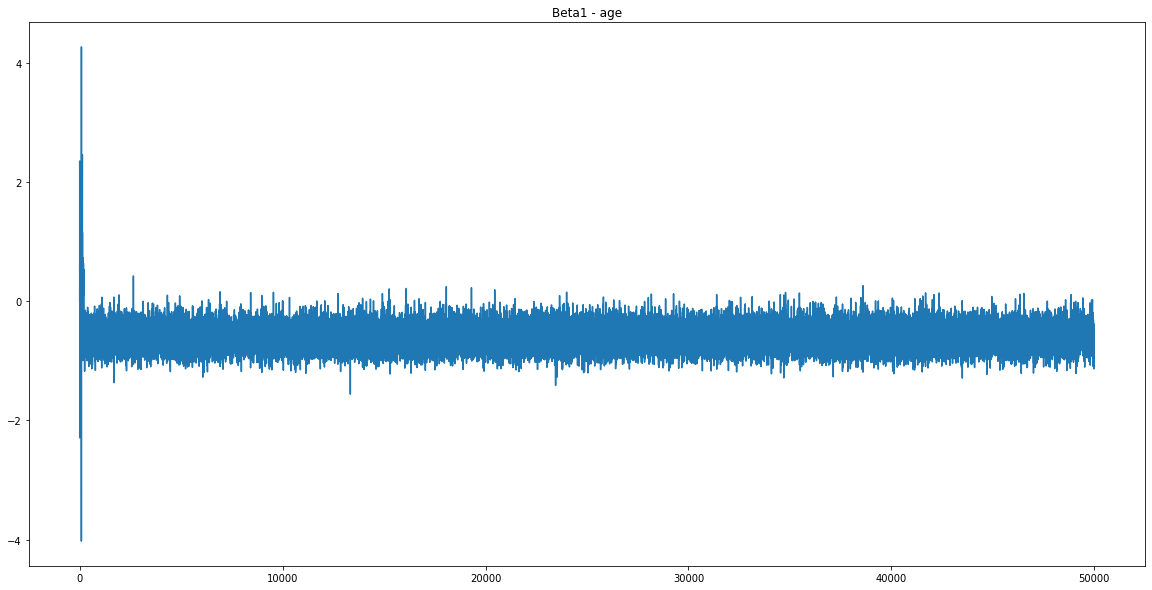

In [ ]:
plt.figure(figsize=(20,10))
plt.title('Beta1 - age')
plt.plot(beta1_T.T[0])

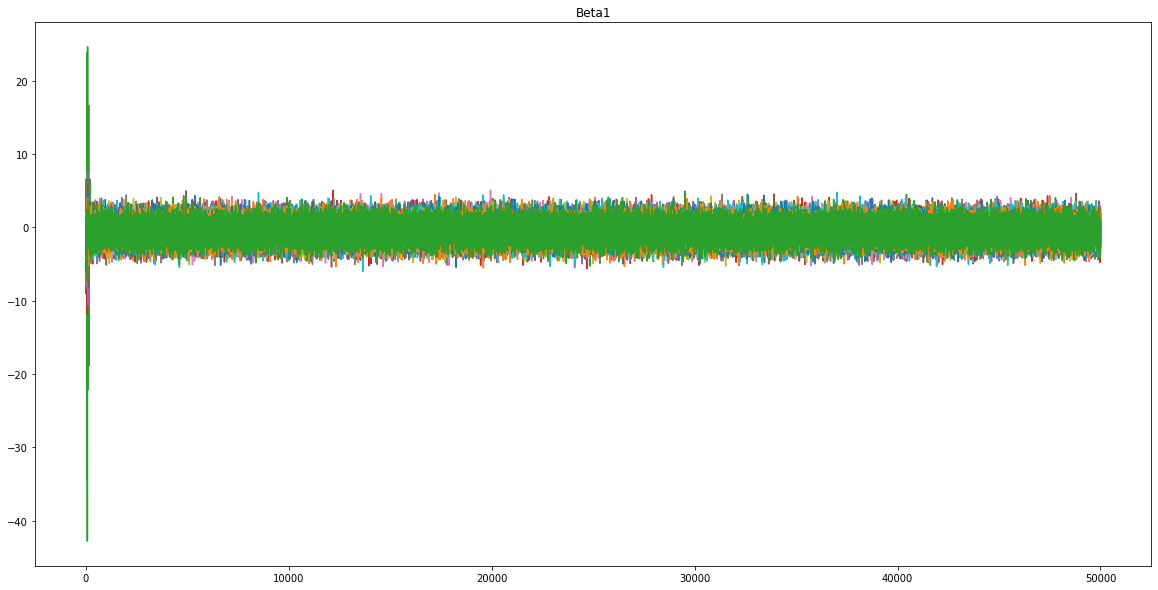

In [ ]:
plt.figure(figsize=(20,10))
plt.title('Beta1')
plt.plot(beta1_T)

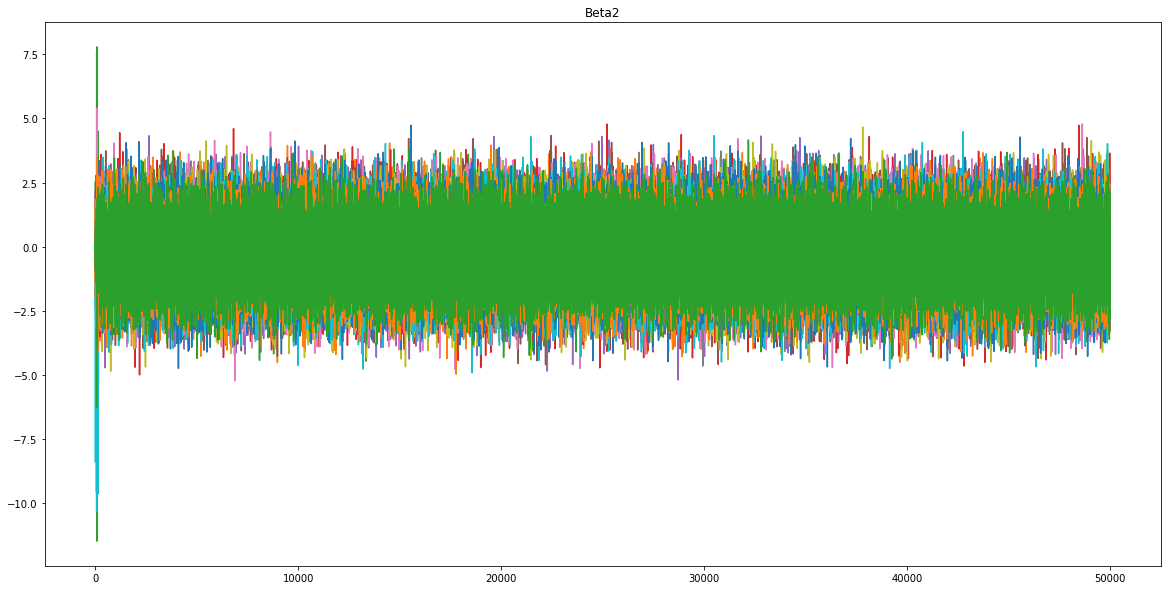

In [ ]:
plt.figure(figsize=(20,10))
plt.title('Beta2')
plt.plot(beta2_T)

In [ ]:
print('lambda :', np.mean(lambda_T, axis=0))
print('-----------------------------------------------------------------------------------')
print('sigma^2 :', np.mean(sigma2_T, axis=0))
print('-----------------------------------------------------------------------------------')
print('Beta1 :', np.mean(beta1_T, axis=0))
print('-----------------------------------------------------------------------------------')
print('Beta2 :', np.mean(beta2_T, axis=0))
print('-----------------------------------------------------------------------------------')
print('Alpha :', np.mean(alpha_T, axis=0))

lambda : 0.9720813793519459
-----------------------------------------------------------------------------------
sigma^2 : 88.48471277769215
-----------------------------------------------------------------------------------
Beta1 : [-0.6063103  -0.39091051 -0.46814114 -0.42674791 -0.37835096 -0.38468831
 -0.4176231  -0.46593212 -0.41663859 -0.43427467 -0.40690225 -0.51134077
 -0.45988717]
-----------------------------------------------------------------------------------
Beta2 : [-0.19519107 -0.2104816  -0.31992145 -0.23944977 -0.21719103 -0.20579426
 -0.20259032 -0.31773385 -0.22804107 -0.24283528 -0.20916937 -0.30806492
 -0.26702373]
-----------------------------------------------------------------------------------
Alpha : [ 1.57890615  1.68079515  2.50922633  2.12698521  3.08323495  2.75502553
  2.4626334   1.89247806  2.2559129   4.17624147  7.95038423  9.07376831
  9.35445763 10.17505256  2.74386849  2.96984785  4.86054894  3.36784171
  4.09532461  5.61870841  2.06300502  2.80608